# Checking RIVM data dor corralations

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats
from scipy.stats import chisquare
import seaborn as sns

In [11]:
%run ./data/data.ipynb

Pulling data from sources.json:
(Source: CBS)  deceased @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=70895ned&_theme=76
(Source: CBS)  population @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=37230ned&_theme=76
(Source: RIVM) counts_per_municipality @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427
(Source: RIVM) prevalence @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
(Source: RIVM) r @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
(Source: RIVM) homes_for_elderly @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/0179dd26-7bf6-4021-857f-8623aaf8e73a
(Source: RIVM) homes_for_disabled @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/aa28b74d-7150-47bc-a7cb-98876e93381b
(Source: RIVM) seventy_plus_living_at_home @ https://data.riv

In [12]:
rivm_per_day.drop(columns=['prev_low',
                   'prev_up',
                   'Hospital_admission_NICE_notification',
                   'IC_admission_notification',
                   'Rt_low',
                   'Rt_up'], inplace=True)
rivm_per_day.dropna(inplace=True)
rivm_per_day

,prev_avg,Deceased_covid,Positive_tests,Hospital_admission,Hospital_admission_NICE,IC_admission,IC_Bedden_COVID,IC_Bedden_Non_COVID,Kliniek_Bedden,IC_Nieuwe_Opnames_COVID,Kliniek_Nieuwe_Opnames_COVID,IC_Bedden_TOTAAL,Rt_avg,Positive_tests_elderly_homes,Deceased_elderly_homes,new_infected_elderly_homes,balance_infected_elderly_homes,year,week
Date,,,,,,,,,,,,,,,,,,,
2020-02-17,1189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.93,NaN,NaN,NaN,NaN,2020,7
2020-02-18,1361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.74,NaN,NaN,NaN,NaN,2020,7
2020-02-19,1614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.59,NaN,NaN,NaN,NaN,2020,7
2020-02-20,1888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.74,NaN,NaN,NaN,NaN,2020,7
2020-02-21,2273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.03,NaN,NaN,NaN,NaN,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-02,0.0,16.0,7243.0,91.0,201.0,70.0,705.0,419.0,1625.0,48.0,276.0,1124.0,NaN,21.0,2.0,3.0,194.0,2021,13
2021-04-03,0.0,31.0,7635.0,67.0,155.0,45.0,734.0,407.0,1614.0,54.0,243.0,1141.0,NaN,15.0,0.0,4.0,192.0,2021,13
2021-04-04,0.0,16.0,6894.0,60.0,166.0,53.0,730.0,367.0,1587.0,53.0,177.0,1097.0,NaN,18.0,1.0,2.0,188.0,2021,13


In [18]:
# check for normality: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
for c in rivm_per_day.columns:
    print(c)
    stat, p = chisquare(rivm_per_day[c])
    print('stat=%.3f, p=%.3f' % (stat,p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print()

prev_avg
stat=15333832.231, p=0.000
Probably not Gaussian

Deceased_covid
stat=18261.327, p=0.000
Probably not Gaussian

Positive_tests
stat=1340079.797, p=0.000
Probably not Gaussian

Hospital_admission
stat=44522.291, p=0.000
Probably not Gaussian

Hospital_admission_NICE
stat=39848.092, p=0.000
Probably not Gaussian

IC_admission
stat=8888.692, p=0.000
Probably not Gaussian

IC_Bedden_COVID
stat=116091.171, p=0.000
Probably not Gaussian

IC_Bedden_Non_COVID
stat=29319.481, p=0.000
Probably not Gaussian

Kliniek_Bedden
stat=233668.192, p=0.000
Probably not Gaussian

IC_Nieuwe_Opnames_COVID
stat=9632.725, p=0.000
Probably not Gaussian

Kliniek_Nieuwe_Opnames_COVID
stat=53832.453, p=0.000
Probably not Gaussian

IC_Bedden_TOTAAL
stat=67243.150, p=0.000
Probably not Gaussian

Rt_avg
stat=25.092, p=1.000
Probably Gaussian

Positive_tests_elderly_homes
stat=42112.294, p=0.000
Probably not Gaussian

Deceased_elderly_homes
stat=8126.031, p=0.000
Probably not Gaussian

new_infected_elderly_ho

In [41]:
def corr_visual(df, method):
    matrix = df.corr(method=method)
    plt.figure(figsize=(20, 8))
    sns.heatmap(matrix.replace(1,np.nan), annot=True, cmap="RdYlGn", vmin=-1, vmax=1)

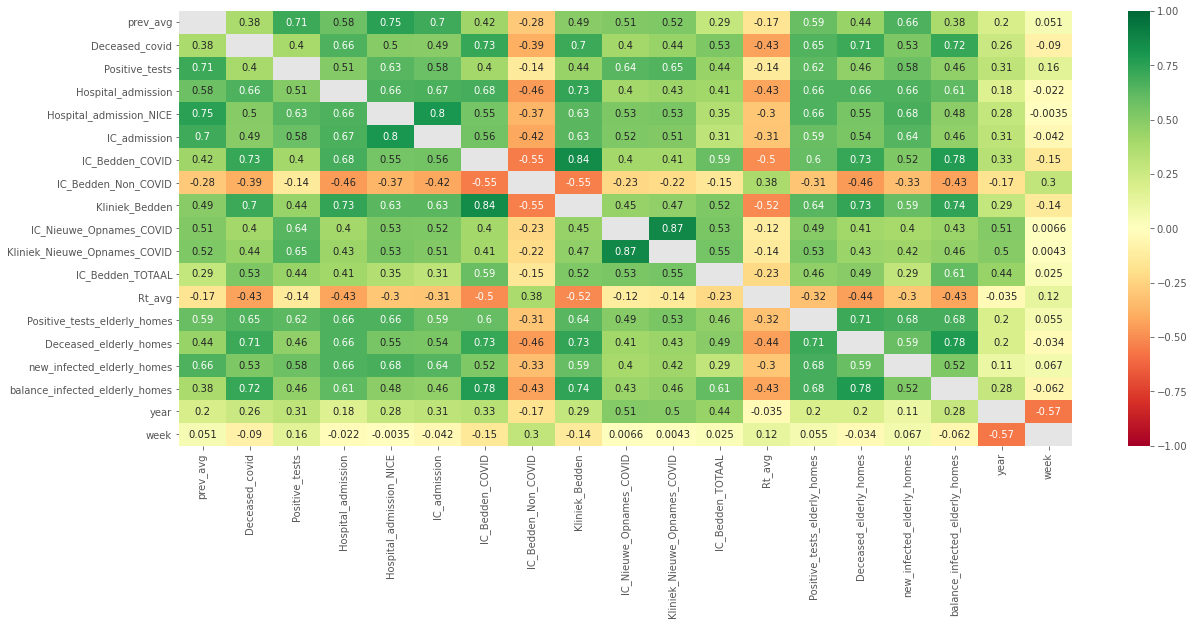

In [42]:
corr_visual(rivm_per_day, 'kendall')

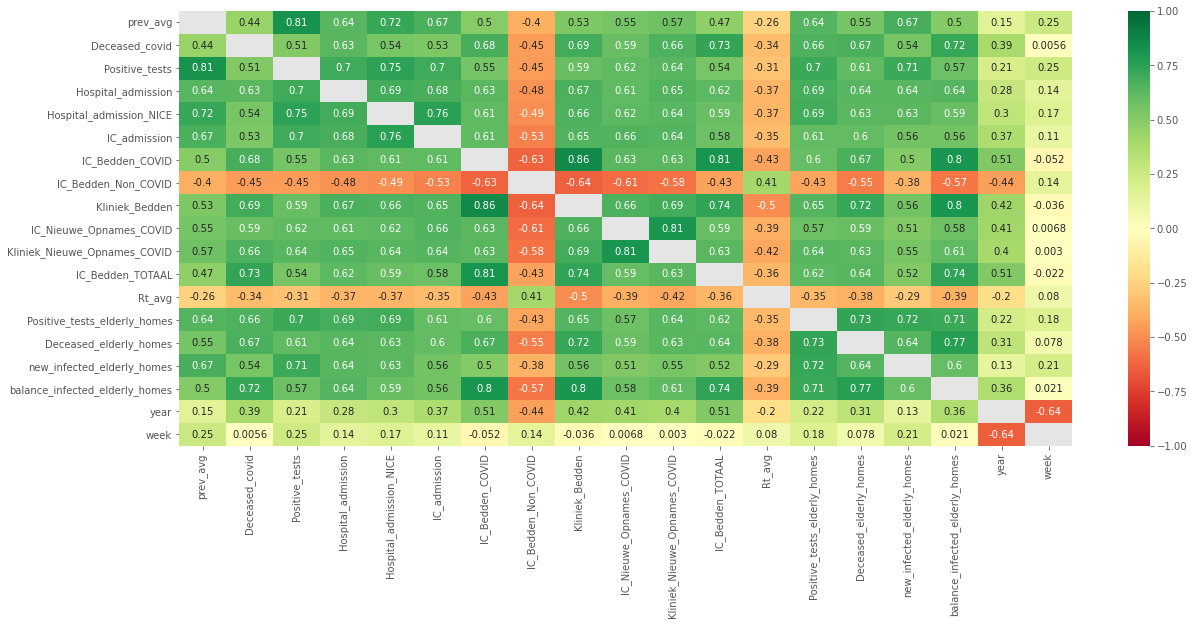

In [43]:
corr_visual(rivm_per_day['2020-06-01':'2021-03-30'], 'kendall')

## regression

In [108]:
def regress(x_label, y_label, x, y):
    slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    print(line)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x, label=line)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(facecolor='white')
    plt.show()

prev_avg,Deceased_covid
Regression line: y=nan+nanx, r=nan


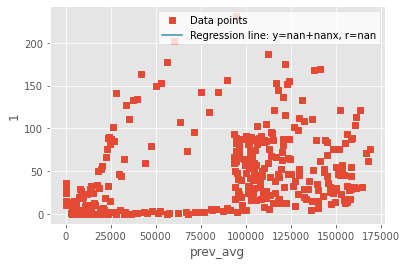

prev_avg,Positive_tests
Regression line: y=nan+nanx, r=nan


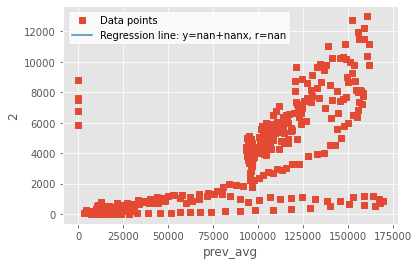

prev_avg,Hospital_admission
Regression line: y=nan+nanx, r=nan


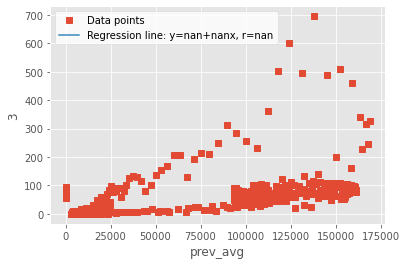

prev_avg,Hospital_admission_NICE
Regression line: y=nan+nanx, r=nan


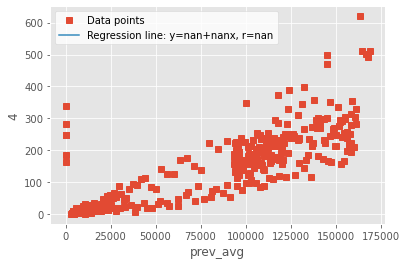

prev_avg,IC_admission
Regression line: y=nan+nanx, r=nan


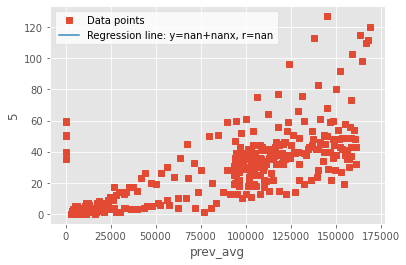

prev_avg,IC_Bedden_COVID
Regression line: y=nan+nanx, r=nan


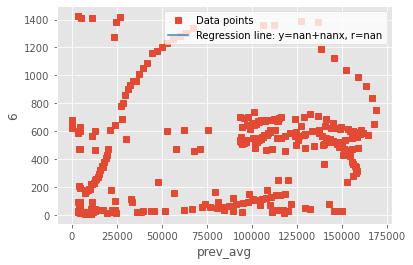

prev_avg,IC_Bedden_Non_COVID
Regression line: y=nan+nanx, r=nan


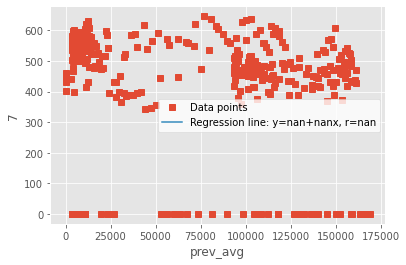

prev_avg,Kliniek_Bedden
Regression line: y=nan+nanx, r=nan


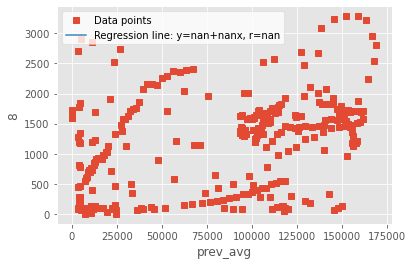

prev_avg,IC_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


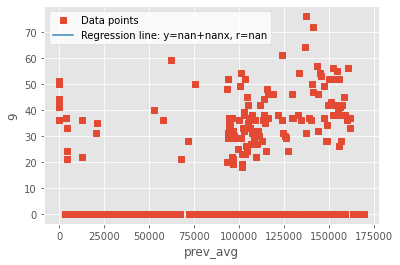

prev_avg,Kliniek_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


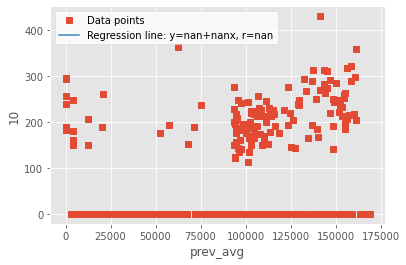

prev_avg,IC_Bedden_TOTAAL
Regression line: y=nan+nanx, r=nan


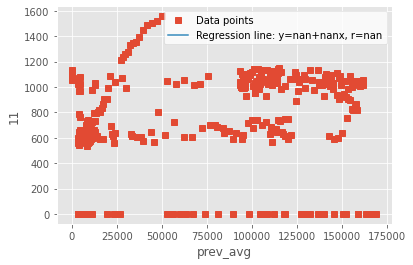

prev_avg,Rt_avg
Regression line: y=nan+nanx, r=nan


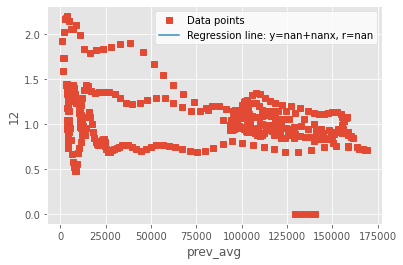

prev_avg,Positive_tests_elderly_homes
Regression line: y=nan+nanx, r=nan


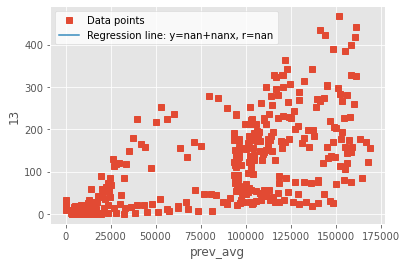

prev_avg,Deceased_elderly_homes
Regression line: y=nan+nanx, r=nan


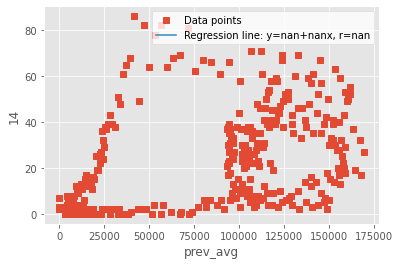

prev_avg,new_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


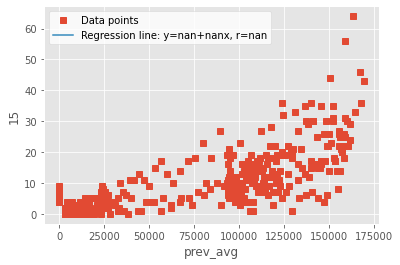

prev_avg,balance_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


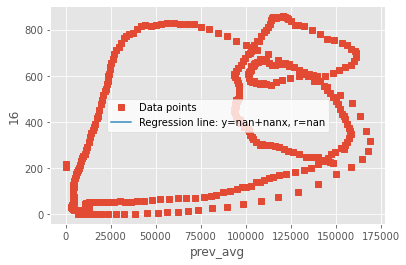

Deceased_covid,Positive_tests
Regression line: y=nan+nanx, r=nan


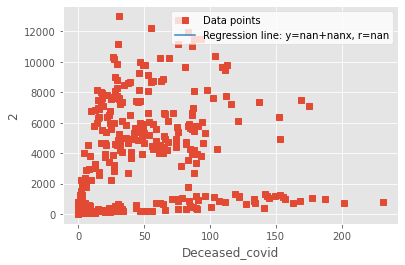

Deceased_covid,Hospital_admission
Regression line: y=nan+nanx, r=nan


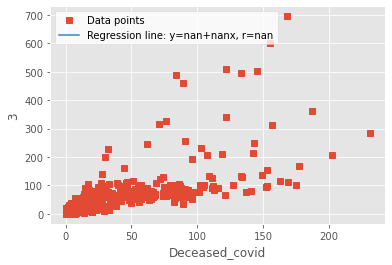

Deceased_covid,Hospital_admission_NICE
Regression line: y=nan+nanx, r=nan


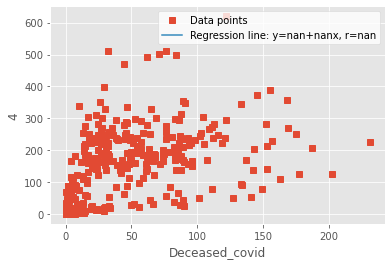

Deceased_covid,IC_admission
Regression line: y=nan+nanx, r=nan


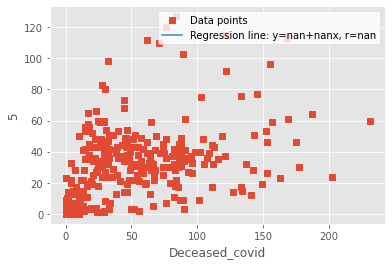

Deceased_covid,IC_Bedden_COVID
Regression line: y=nan+nanx, r=nan


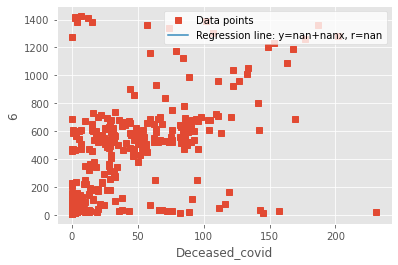

Deceased_covid,IC_Bedden_Non_COVID
Regression line: y=nan+nanx, r=nan


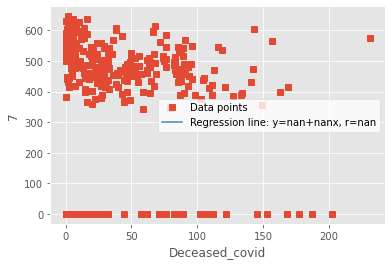

Deceased_covid,Kliniek_Bedden
Regression line: y=nan+nanx, r=nan


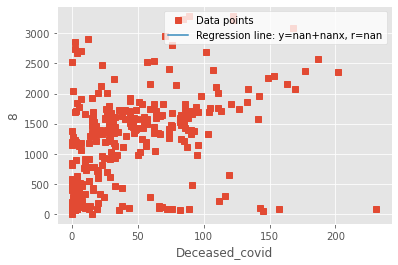

Deceased_covid,IC_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


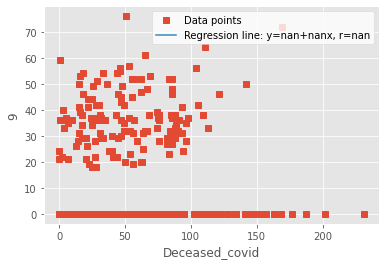

Deceased_covid,Kliniek_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


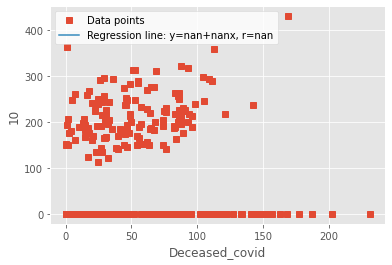

Deceased_covid,IC_Bedden_TOTAAL
Regression line: y=nan+nanx, r=nan


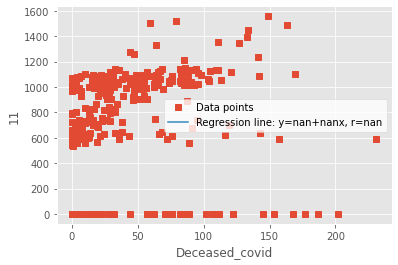

Deceased_covid,Rt_avg
Regression line: y=nan+nanx, r=nan


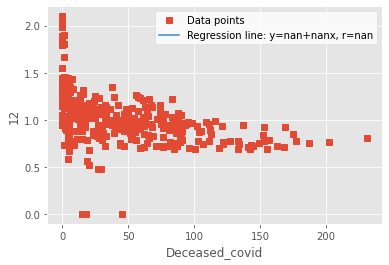

Deceased_covid,Positive_tests_elderly_homes
Regression line: y=nan+nanx, r=nan


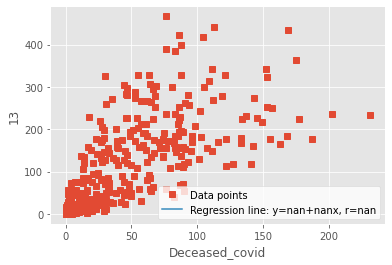

Deceased_covid,Deceased_elderly_homes
Regression line: y=nan+nanx, r=nan


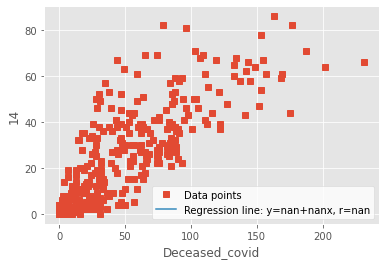

Deceased_covid,new_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


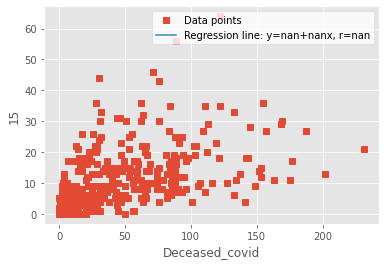

Deceased_covid,balance_infected_elderly_homes
Regression line: y=nan+nanx, r=nan


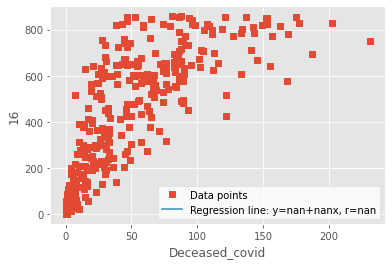

Positive_tests,Hospital_admission
Regression line: y=nan+nanx, r=nan


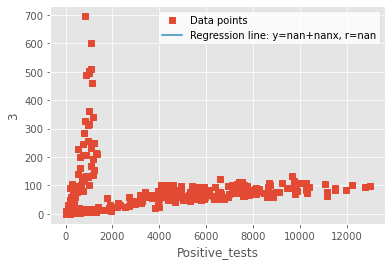

Positive_tests,Hospital_admission_NICE
Regression line: y=nan+nanx, r=nan


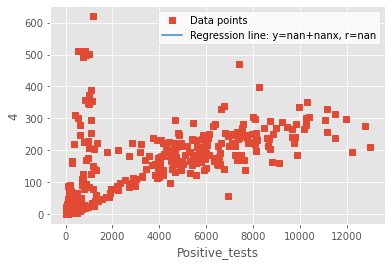

Positive_tests,IC_admission
Regression line: y=nan+nanx, r=nan


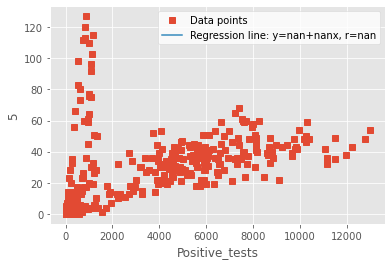

Positive_tests,IC_Bedden_COVID
Regression line: y=nan+nanx, r=nan


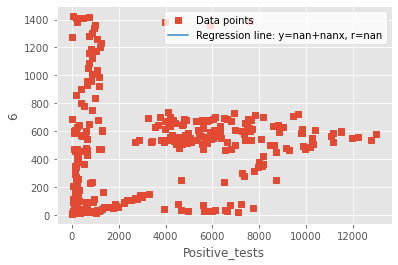

Positive_tests,IC_Bedden_Non_COVID
Regression line: y=nan+nanx, r=nan


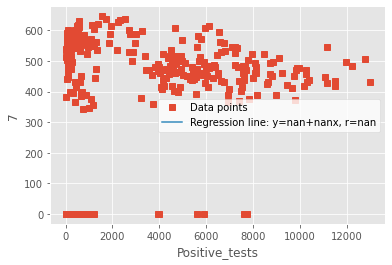

Positive_tests,Kliniek_Bedden
Regression line: y=nan+nanx, r=nan


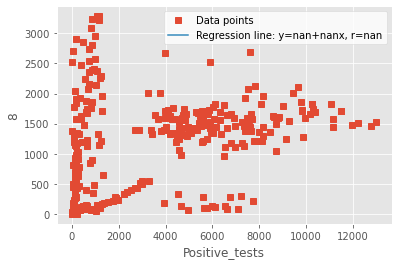

Positive_tests,IC_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


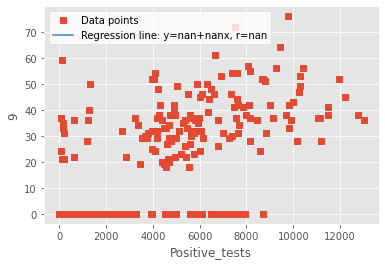

Positive_tests,Kliniek_Nieuwe_Opnames_COVID
Regression line: y=nan+nanx, r=nan


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [109]:
c = 0
len_c = len(rivm.columns)
for column in rivm.columns:
    cn = 1 + c
    while cn < len_c:
        cc = rivm.columns[c]
        ccn = rivm.columns[cn]
        print(cc + ',' + ccn)
        x = rivm[cc]
        y = rivm[ccn]
        regress(cc, cn, x, y)
        cn+=1
    c+=1